## SQL - PYTHON PIPELINE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import date
import datetime
import time

In [3]:
## change server to own server name
server = 'DESKTOP-9ASSRIE\SQLEXPRESS'
database = 'PAI_CA1'
packages = ['sqlalchemy', 'pyodbc']
engine = create_engine('mssql+pyodbc://{}/{}?driver=SQL Server'.format(server, database))

In [4]:
%%time

## establish connection to database
connection = engine.connect()

## obtain Sensor Data and store in DataFrames
cursor = connection.execute('SELECT * FROM Sensor')
sensor = pd.DataFrame(data=cursor.fetchall(), columns=cursor.keys())

## obtain Driver Data
cursor = connection.execute('SELECT * FROM Driver')
driver = pd.DataFrame(data=cursor.fetchall(), columns=cursor.keys())

## obtain Safety Data
cursor = connection.execute('SELECT * FROM Safety')
safety = pd.DataFrame(data=cursor.fetchall(), columns=cursor.keys())

## close connection to database
connection.close()

Wall time: 33.8 s


## Exploratory Data Analysis

### Sensor

In [4]:
accuracyNeg = len(sensor[sensor['accuracy'] < 0])
secondNeg = len(sensor[sensor['second'] < 0])
speedNeg = len(sensor[sensor['speed'] < 0])

print('accuracy: ' + str(accuracyNeg))
print('second: ' + str(secondNeg))
print('speed: ' + str(speedNeg))

accuracy: 0
second: 0
speed: 109724


This shows that there are negative values in the 'speed' column, althought there should'nt be

In [5]:
sensor.isnull().sum()

bookingID              0
accuracy          118025
bearing           119403
acceleration_x    105117
acceleration_y    123103
acceleration_z     99136
gyro_x            133258
gyro_y            139712
gyro_z             65488
second                 0
speed             123577
dtype: int64

A quick check shows that there are quite a number of null values within the sensor data

<AxesSubplot:ylabel='Frequency'>

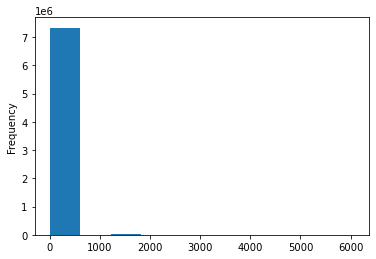

In [6]:
## histogram of accuracy
sensor['accuracy'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

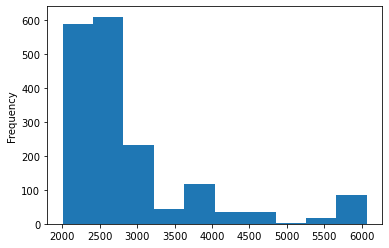

In [7]:
## histogram of accuracy > 2000
sensor[sensor['accuracy'] > 2000]['accuracy'].plot(kind='hist')

The histogram of accuracy greater than 2000 shows that irregular values are existing within the accuracy column of the sensor data

<AxesSubplot:ylabel='Frequency'>

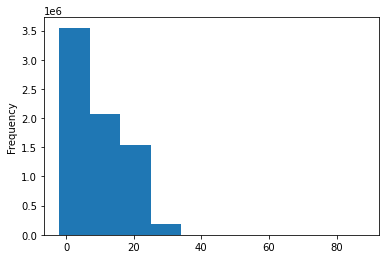

In [8]:
## histogram of speed
sensor['speed'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

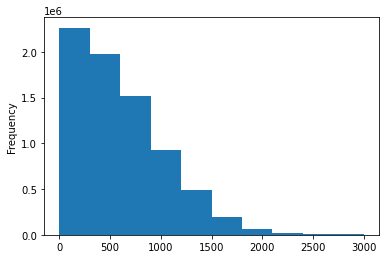

In [9]:
## check 'second' column

filtered = sensor[sensor['second'] <= 3000]
filtered['second'].plot(kind='hist')

Plotting the histogram of seconds less than or equal to 3000 shows that past 3000, lies irregular and unusual data

C:\Users\rutsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='null', ylabel='count'>

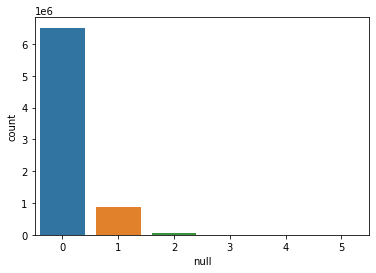

In [10]:
## number of nulls per row
sensorNull = sensor.isnull().sum(axis=1)
sensor['null'] = sensorNull
sns.countplot(sensor['null'])

The null count bar plot shows the distribution of number of null columns per row

In [11]:
sensor['bookingID'] = sensor['bookingID'].astype('float')

<AxesSubplot:>

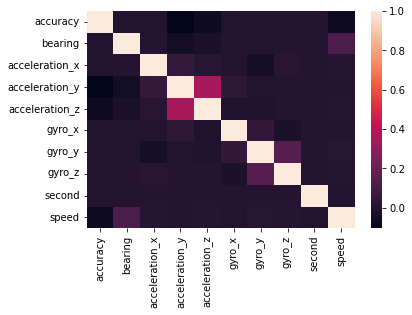

In [12]:
## correlation heatmap of sensor data
corrSensor = sensor.drop(columns=['bookingID', 'null'])
corr = corrSensor.corr()
sns.heatmap(corr)

The correlation heatmap shows that the variables within the sensor data does not have a strong correlation with one another

In [13]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469656 entries, 0 to 7469655
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       float64
 1   accuracy        float64
 2   bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  speed           float64
 11  null            int64  
dtypes: float64(11), int64(1)
memory usage: 683.9 MB


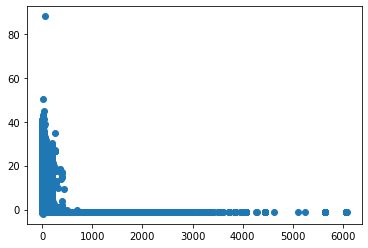

In [14]:
## scatterplot of accuracy and speed
plt.scatter(x=sensor['accuracy'], y=sensor['speed'])
plt.show()

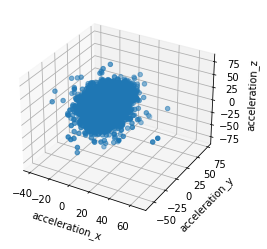

In [15]:
## 3d scatter of acceleration x, y, z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sensor['acceleration_x'], sensor['acceleration_y'], sensor['acceleration_z'])

ax.set_xlabel('acceleration_x')
ax.set_ylabel('acceleration_y')
ax.set_zlabel('acceleration_z')

plt.show()

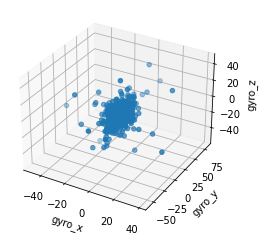

In [16]:
## 3d scatter of gyro x, y, z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sensor['gyro_x'], sensor['gyro_y'], sensor['gyro_z'])

ax.set_xlabel('gyro_x')
ax.set_ylabel('gyro_y')
ax.set_zlabel('gyro_z')

plt.show()

### Driver

In [5]:
driver.isnull().sum()

driverID         0
name             0
date_of_birth    0
gender           0
car_model        0
car_make_year    0
rating           0
dtype: int64

A quick check shows that there are no null values within the driver data

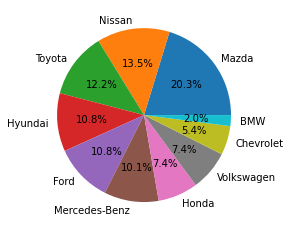

In [17]:
## pie chart of distribution of cars
carCounts = driver['car_model'].value_counts()
carNames = driver['car_model'].unique()
plt.pie(carCounts, labels=carNames, autopct='%1.1f%%')
plt.show()

The above pie chart shows the distribution in percentages of the car brands and their counts

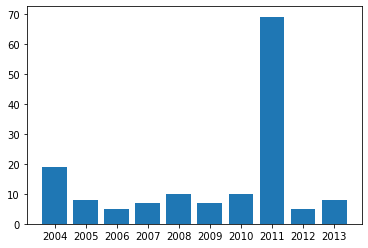

In [18]:
## bar plot of cars year of making
carAge = driver['car_make_year'].value_counts()
ageNums = driver['car_make_year'].unique()
xaxis = np.arange(2004, 2014)
plt.bar(ageNums, carAge)
plt.xticks(xaxis)
plt.show()

The bar chart above shows the year the car was mode and the counts of number of cars within that year

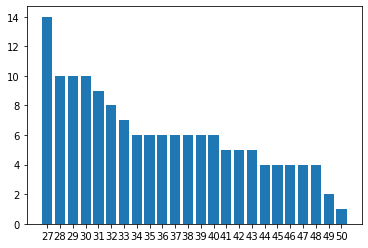

In [19]:
## bar plot of ages of drivers relative to 2022
dates = driver['date_of_birth']
ages = []

def convertdate(dstring):
    return time.strptime(dstring, '%Y-%m-%d')

for date in range(len(dates)):
    age = convertdate(dates[date])[0]
    age = 2022 - age
    ages.append(age)

uniqueAges = list(set(ages))
ages = pd.Series(ages).value_counts()
plt.bar(x=uniqueAges, height=ages)
plt.xticks(uniqueAges)
plt.show()

This bar chart shows the ages of the drivers and their counts

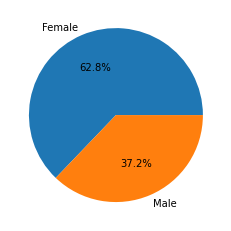

In [20]:
gender = driver['gender']
genderCounts = gender.value_counts()
genders = gender.unique()
plt.pie(genderCounts, labels=genders, autopct='%1.1f%%')
plt.show()

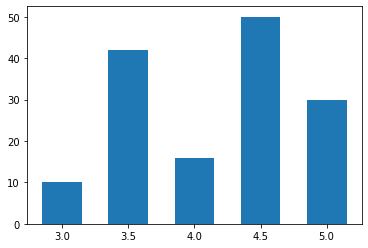

In [21]:
rating = driver['rating']
ratingCounts = rating.value_counts()
ratings = rating.unique()
plt.bar(ratings, height=ratingCounts, width=0.3)
plt.xticks(ratings)
plt.show()

This bar chart shows unique rating counts and how many of each rating exists

### Safety

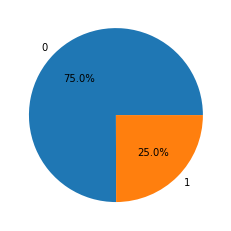

In [22]:
## 0 = normal
## 1 = dangerous
safe = safety['label'].value_counts()
labels = ['0', '1']
plt.pie(safe, labels=labels, autopct='%1.1f%%')
plt.show()

## Data Preprocessing & Wrangling

This section handles the data preprocessing and wrangling of the sensor data to ensure NULL and nonsensical values are cleansed

In [23]:
## check for total number of null values in sensor, driver and safety dataframes
print('Number of NULL in Sensor: ' + str(sensor.isnull().sum().sum()))
print('Number of NULL in Driver: ' + str(driver.isnull().sum().sum()))
print('Number of NULL in Safety: ' + str(safety.isnull().sum().sum()))

Number of NULL in Sensor: 1026819
Number of NULL in Driver: 0
Number of NULL in Safety: 0


In [24]:
## check number of nulls in each column of Sensor
sensor.isnull().sum()

bookingID              0
accuracy          118025
bearing           119403
acceleration_x    105117
acceleration_y    123103
acceleration_z     99136
gyro_x            133258
gyro_y            139712
gyro_z             65488
second                 0
speed             123577
null                   0
dtype: int64

## Drop Rows With > 2000 Accuracy

In [25]:
test = sensor[sensor['accuracy'] > 2000]
dropIndex = test.index
sensor = sensor.drop(index=dropIndex)

## Drop Rows with Negative Speed

In [26]:
sensor = sensor.drop(sensor[sensor['speed'] < 0].index)

## Drop Rows With 4/5 NULL Columns

In [27]:
sensor.drop(sensor[sensor['null'] >= 4].index, inplace=True)

In [28]:
sensor[sensor['null'] >=4]

,bookingID,accuracy,bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,speed,null


## Impute Rows With 1-3 NULL Columns (Median)

In [29]:
## impute rows with 1-3 NULL columns with the median of the other values within the booking id group
for i in range(1, len(sensor.keys())-1):
    sensor[sensor.keys()[i]] = sensor[sensor.keys()[i]].fillna(sensor.groupby('bookingID')[sensor.keys()[i]].transform('median'))

In [30]:
sensor.isnull().sum()

bookingID           0
accuracy            0
bearing             0
acceleration_x      0
acceleration_y      0
acceleration_z      0
gyro_x              0
gyro_y              0
gyro_z              1
second              0
speed             137
null                0
dtype: int64

## Impute 'second' Column

In [31]:
irregular = sensor[sensor['second'] > 3000]
dropIndex = irregular.index
sensor = sensor.drop(index=dropIndex)

## Remove 'null' Column

In [32]:
sensor = sensor.drop(columns=['null'])

In [33]:
sensor['bookingID'] = sensor['bookingID'].astype('float')
safety['bookingID'] = safety['bookingID'].astype('float')

driver['driverID'] = driver['driverID'].astype('float')
safety['driverID'] = safety['driverID'].astype('float')

## Pipeline DataFrames Into New SQL Server Database

In [34]:
## create connection settings to sql server
server = 'DESKTOP-9ASSRIE\SQLEXPRESS'
packages = ['sqlalchemy', 'pyodbc']
connection_string = f"DRIVER=SQL Server; SERVER={server}; Trusted_Connection=True;"

In [35]:
%%time

## connect to database in SQL Server and pipeline data into new database
import pyodbc

database_name = 'PAI_CA1_IMPUTED'

connection = pyodbc.connect(connection_string, autocommit = True)
cursor  = connection.cursor()

sql_create_database = f"CREATE DATABASE {database_name}"
cursor.execute(sql_create_database)

set_database = f"USE {database_name}"
cursor.execute(set_database)

sqlengine = create_engine('mssql+pyodbc://{}/{}?driver=SQL Server'.format(server, database_name), echo=True)

connection.commit()
driver.to_sql('Driver', con=sqlengine, index = False)
safety.to_sql('Safety', con=sqlengine, index = False)
sensor.to_sql('Sensor', con=sqlengine, index = False)

2022-12-02 02:54:36,731 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2022-12-02 02:54:36,731 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-02 02:54:36,732 INFO sqlalchemy.engine.Engine SELECT schema_name()
2022-12-02 02:54:36,732 INFO sqlalchemy.engine.Engine [generated in 0.00031s] ()
2022-12-02 02:54:36,734 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2022-12-02 02:54:36,734 INFO sqlalchemy.engine.Engine [generated in 0.00024s] ()
2022-12-02 02:54:36,736 INFO sqlalchemy.engine.Engine SELECT [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME] 
FROM [INFORMATION_SCHEMA].[TABLES] 
WHERE [INFORMATION_SCHEMA].[TABLES].[TABLE_TYPE] = CAST(? AS NVARCHAR(max)) AND [INFORMATION_SCHEMA].[TABLES].[TABLE_NAME] = CAST(? AS NVARCHAR(max)) AND [INFORMATION_SCHEMA].[TABLES].[TABLE_SCHEMA] = CAST(? AS NVARCHAR(max))
2022-12-02 02:54:36,737 INFO sqlalchemy.engine.Engine [generated in 0.00033s] ('BASE TABLE', 'Driver', 'dbo')
2022-

2022-12-02 03:05:20,312 INFO sqlalchemy.engine.Engine [cached since 641s ago] ('dbo', 'BASE TABLE')
Wall time: 10min 43s
